In [10]:
import torch
import torchvision
import matplotlib.pyplot as plt
from ops import dataset_config
from ops.dataset import TSNDataSet
from opts import parser
from ops.transforms import GroupMultiScaleCrop, IdentityTransform, Stack, ToTorchFormatTensor

In [8]:
args = parser.parse_args(['jester', 'RGB'])
data_length = 1
input_size = 224

In [11]:
num_class, args.train_list, args.val_list, args.root_path, prefix = dataset_config.return_dataset('jester', 'RGB')
train_augmentation = torchvision.transforms.Compose([
    GroupMultiScaleCrop(input_size, [1, .875, .75, .66])
])
normalize = IdentityTransform()
train_loader = torch.utils.data.DataLoader(
    TSNDataSet(
        args.root_path, 
        args.train_list,
        num_segments=args.num_segments,
        new_length=data_length,
        modality=args.modality,
        image_tmpl=prefix,
        transform=torchvision.transforms.Compose([
            train_augmentation,
            Stack(
                roll=(args.arch in ['BNInception', 'InceptionV3'])),
            ToTorchFormatTensor(
                div=(args.arch not in ['BNInception', 'InceptionV3'])),
            normalize,
        ]), dense_sample=args.dense_sample),
    batch_size=args.batch_size, shuffle=True,
    num_workers=args.workers, pin_memory=True,
    drop_last=True)

jester: 27 classes
video number:118562


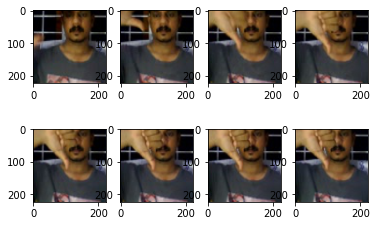

In [26]:
for imgs, target in train_loader:
    sample = imgs[0].numpy().transpose([1, 2, 0])
    for i in range(8):
        ax = plt.subplot((240+i+1))
        ax.imshow(sample[:, :, i*3:(i+1)*3])
    break